In [2]:
!wget -q https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv -O car_fuel_efficiency.csv

In [4]:
import pandas as pd
df = pd.read_csv("car_fuel_efficiency.csv")
df.head()df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()


,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369


In [5]:
df = df[['engine_displacement', 'horsepower', 'vehicle_weight', 'model_year', 'fuel_efficiency_mpg']]
df.head()


,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,170,159.0,3413.433759,2003,13.231729
1,130,97.0,3149.664934,2007,13.688217
2,170,78.0,3079.038997,2018,14.246341
3,220,NaN,2542.392402,2009,16.912736
4,210,140.0,3460.870990,2009,12.488369


<Axes: >

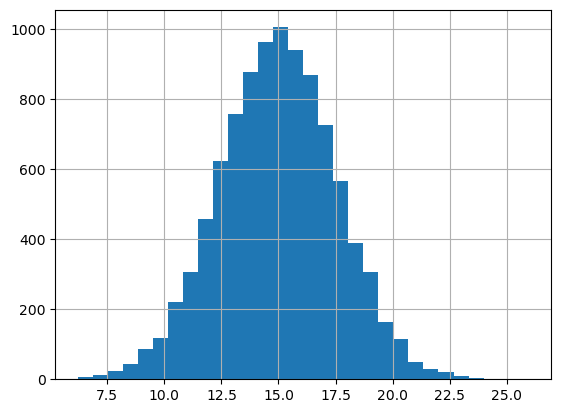

In [6]:
df['fuel_efficiency_mpg'].hist(bins=30)


In [7]:
df.isnull().sum()


engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

In [8]:
df['horsepower'].median()


149.0

In [13]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# === 1) Загрузка и выбор колонок ===
df = pd.read_csv("car_fuel_efficiency.csv")
cols = ['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']
df = df[cols].copy()

# признаки и цель
X = df[['engine_displacement','horsepower','vehicle_weight','model_year']]
y = df['fuel_efficiency_mpg']

# === 2) Сплит 60/20/20 с seed=42 ===
# сначала отделяем 40% (под val+test)
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=42)
# затем половину (20%) на val и половину (20%) на test
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=42)

# удобные хелперы
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# === 3A) Вариант: fillna(0) для всех признаков ===
X_train_0 = X_train.fillna(0)
X_val_0   = X_val.fillna(0)

lr0 = LinearRegression()
lr0.fit(X_train_0, y_train)
rmse_0 = rmse(y_val, lr0.predict(X_val_0))

# === 3B) Вариант: fillna(mean) ТОЛЬКО по train, и ТОЛЬКО для horsepower ===
hp_mean = X_train['horsepower'].mean()
X_train_m = X_train.fillna({'horsepower': hp_mean})
X_val_m   = X_val.fillna({'horsepower': hp_mean})

lrm = LinearRegression()
lrm.fit(X_train_m, y_train)
rmse_m = rmse(y_val, lrm.predict(X_val_m))

print("RMSE (fill 0):   ", round(rmse_0, 2))
print("RMSE (fill mean):", round(rmse_m, 2))

if abs(rmse_0 - rmse_m) < 1e-12:
    print("Q3 answer: Both are equally good")
else:
    print("Q3 answer:", "With mean" if rmse_m < rmse_0 else "With 0")




RMSE (fill 0):    0.52
RMSE (fill mean): 0.46
Q3 answer: With mean


In [14]:
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# fillna=0 для train/val
X_train_r = X_train.fillna(0)
X_val_r   = X_val.fillna(0)

candidates = [0, 0.01, 0.1, 1, 5, 10, 100]
scores = {}

for r in candidates:
    if r == 0:
        # Ridge(alpha=0) эквивалентен обычной линейной регрессии
        from sklearn.linear_model import LinearRegression
        model = LinearRegression()
    else:
        model = Ridge(alpha=r, fit_intercept=True, random_state=42)
    model.fit(X_train_r, y_train)
    preds = model.predict(X_val_r)
    scores[r] = rmse(y_val, preds)

# округлённые значения для ответа
rounded = {r: round(s, 2) for r, s in scores.items()}
best_score = min(scores.values())
best_candidates = [r for r, s in scores.items() if abs(s - best_score) < 1e-12]
best_r = min(best_candidates)  # при равенстве — меньший r

print("Q4 RMSE by r (rounded):", rounded)
print("Q4 best r:", best_r)


Q4 RMSE by r (rounded): {0: np.float64(0.52), 0.01: np.float64(0.52), 0.1: np.float64(0.52), 1: np.float64(0.52), 5: np.float64(0.52), 10: np.float64(0.52), 100: np.float64(0.52)}
Q4 best r: 100


In [15]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

rmses = []

for seed in range(10):  # seeds 0–9
    X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=seed)
    X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=seed)
    
    X_train_filled = X_train.fillna(0)
    X_val_filled = X_val.fillna(0)

    model = LinearRegression()
    model.fit(X_train_filled, y_train)
    y_pred = model.predict(X_val_filled)
    
    rmses.append(rmse(y_val, y_pred))

std = np.std(rmses)
print("RMSE per seed:", [round(r, 3) for r in rmses])
print("Standard deviation:", round(std, 3))


RMSE per seed: [np.float64(0.518), np.float64(0.517), np.float64(0.52), np.float64(0.522), np.float64(0.511), np.float64(0.515), np.float64(0.515), np.float64(0.536), np.float64(0.519), np.float64(0.52)]
Standard deviation: 0.006


In [16]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error
import numpy as np

def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

# 1. Новый сплит (seed=9)
X_train, X_tmp, y_train, y_tmp = train_test_split(X, y, test_size=0.4, random_state=9)
X_val, X_test, y_val, y_test = train_test_split(X_tmp, y_tmp, test_size=0.5, random_state=9)

# 2. Объединяем train и val
X_full_train = pd.concat([X_train, X_val])
y_full_train = pd.concat([y_train, y_val])

# 3. Заполняем пропуски нулями
X_full_train_filled = X_full_train.fillna(0)
X_test_filled = X_test.fillna(0)

# 4. Обучаем Ridge-регрессию с r=0.001
model = Ridge(alpha=0.001)
model.fit(X_full_train_filled, y_full_train)

# 5. Считаем RMSE на тесте
y_pred_test = model.predict(X_test_filled)
rmse_test = rmse(y_test, y_pred_test)

print("Final RMSE on test:", round(rmse_test, 3))


Final RMSE on test: 0.521
